# Classifier Pre-Defined functions with Logistic Regression Example

## Defining the functions

In [1]:
import pandas as pd
import numpy as np

#This dataframe stores the scores from classifier models
df_model=pd.DataFrame(columns=['Model','Accuracy Score' ,'F1 Score', 'Precision Score' , 'Recall Score' ,'ROC AUC'])
df_model_performance =df_model

#This dataframe stores the train and test accuracy from classifier models to compare at the end of the model building. This can also be further modified to compare the other scores such as F1 score etc
df_model_test_train_acc = pd.DataFrame(columns=['Model' , 'Train Accuracy Score' ,'Test Accuracy Score'])
df_model_accuracy =df_model_test_train_acc

In [2]:
from sklearn.model_selection import GridSearchCV 
def get_best_hyperparameters(model, params, cv_value , X_train, y_train ): 
    search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=1,cv=cv_value) 
    search.fit(X_train, y_train)  
    print("Best Accuracy    :",  search.best_score_) 
    print("Best Parameters  : ", search.best_params_)
    print("Best Estimators : ",  search.best_estimator_)  
    best_grid = search.best_estimator_
    return best_grid

In [3]:
def get_classifier_predictions(classifier, X_train, y_train, X_test): 
    classifier.fit(X_train,y_train)
    y_pred_train =classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    y_pred_prob_train = classifier.predict_proba(X_train)
    y_pred_prob_test = classifier.predict_proba(X_test)
    return y_pred_train, y_pred_test, y_pred_prob_train,y_pred_prob_test

In [4]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score , recall_score , f1_score, plot_confusion_matrix ,roc_auc_score
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline

def print_classifier_scores(classifier, X_train, X_test, y_train ,y_test,y_pred_train, y_pred_test,y_pred_prob_train, y_pred_prob_test,algorithm):
# store classifier scores for Training Dataset
    v_recall_score_train =  recall_score(y_train,y_pred_train)
    v_precision_score_train = precision_score(y_train,y_pred_train)
    v_f1_score_train =  f1_score(y_train,y_pred_train)
    v_accuracy_score_train = accuracy_score(y_train,y_pred_train)
    v_roc_auc_train = roc_auc_score(y_train, y_pred_prob_train[:,1])
    
# print classifier scores for Training Dataset
    print('Train-Set Confusion Matrix:\n', confusion_matrix(y_train,y_pred_train)) 
    print("Recall Score    : ", v_recall_score_train)
    print("Precision Score : ", v_precision_score_train)
    print("F1 Score        : ", v_f1_score_train)
    print("Accuracy Score  : ", v_accuracy_score_train)
    print("ROC AUC         :  {}".format(v_roc_auc_train))
    print("Predict Probability  :" , y_pred_prob_train)
    plot_confusion_matrix(classifier, X_train , y_train , display_labels = ["1" , "0"])
    plt.grid(b=None)
# store classifier scores for Testing Dataset 
   
    v_recall_score_test =  recall_score(y_test,y_pred_test)
    v_precision_score_test = precision_score(y_test,y_pred_test)
    v_f1_score_test =  f1_score(y_test,y_pred_test)
    v_accuracy_score_test = accuracy_score(y_test,y_pred_test)
    v_roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:,1])
# Print classifier scores for Testing Dataset    
    print('Test-Set Confusion Matrix:\n', confusion_matrix(y_test,y_pred_test)) 
    print("Recall Score    : ", v_recall_score_test)
    print("Precision Score : ", v_precision_score_test)
    print("F1 Score        : ", v_f1_score_test)
    print("Accuracy Score  : ", v_accuracy_score_test)
    print("ROC AUC         :  {}".format(v_roc_auc_test))
    print("Predict Probability  :" , y_pred_prob_test)
    plot_confusion_matrix(classifier, X_test , y_test , display_labels = ["1" , "0"])
    plt.grid(b=None)
# store to append the results in dataframe for final comparison of performance 
    df_model_test_train_acc = dict({'Model' : algorithm, 'Train Accuracy Score' :v_accuracy_score_train,'Test Accuracy Score' :v_accuracy_score_test })
    df_model_performance = dict({'Model' : algorithm, 'Accuracy Score' :v_accuracy_score_test, 'F1 Score' : v_f1_score_test, 'Precision Score' : v_precision_score_test, 'Recall Score' :v_recall_score_test, 'ROC AUC' : v_roc_auc_test})
    
    return df_model_test_train_acc , df_model_performance

## Get the data set and transform into X (independent ) and y (dependent)

In [5]:
df_garment_prod = pd.read_csv(filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
print('Data Shape:', df_garment_prod.shape)
df_garment_prod.head()

Data Shape: (1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df_garment_prod = df_garment_prod.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [7]:
df_garment_prod=df_garment_prod.dropna()

In [8]:
df_garment_prod['target_achieved'] = np.where((df_garment_prod['targeted_productivity']< df_garment_prod['actual_productivity']) 
                                 , 'yes' ,'no')

In [9]:
X = df_garment_prod.iloc[:,:-2] 

In [10]:
y = df_garment_prod['target_achieved'].replace(('yes', 'no'), (1, 0))

In [11]:
X = pd.get_dummies(X, columns=['quarter' ,'department' , 'team', 'no_of_style_change'],  drop_first=True)

In [12]:
X.drop(columns=['date','day'],inplace=True)

## Split the dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(897, 27)
(897,)
(300, 27)
(300,)


## Logistic Regression Model using pre-defined functions

Hyperparameter Tuning - This step is optional or and empty parameter dictionary can also be passed

In [14]:
from sklearn.linear_model import LogisticRegression
logreg_params = {'penalty' : ['l2'],
                 'C' : np.logspace(-1, 2, 100),
                 'solver' :['liblinear'],
                 'random_state' :[42,99]
                 }
lr_best_grid= get_best_hyperparameters(LogisticRegression(), logreg_params, 5, X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Accuracy    : 0.7770453134698944
Best Parameters  :  {'C': 2.009233002565047, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Estimators :  LogisticRegression(C=2.009233002565047, random_state=42, solver='liblinear')


Fit and predict using Best Grid obtained from hyperparameter tuning

In [15]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(lr_best_grid, X_train, y_train, X_test )

Calculate and print the perfomance metrics

Train-Set Confusion Matrix:
 [[104 143]
 [ 43 607]]
Recall Score    :  0.9338461538461539
Precision Score :  0.8093333333333333
F1 Score        :  0.8671428571428572
Accuracy Score  :  0.7926421404682275
ROC AUC         :  0.8338617253192152
Predict Probability  : [[0.2947536  0.7052464 ]
 [0.03756871 0.96243129]
 [0.10350044 0.89649956]
 ...
 [0.11610696 0.88389304]
 [0.2887715  0.7112285 ]
 [0.03507995 0.96492005]]
Test-Set Confusion Matrix:
 [[ 21  60]
 [ 18 201]]
Recall Score    :  0.9178082191780822
Precision Score :  0.7701149425287356
F1 Score        :  0.8375
Accuracy Score  :  0.74
ROC AUC         :  0.7432493376176785
Predict Probability  : [[5.29732089e-02 9.47026791e-01]
 [2.87828773e-01 7.12171227e-01]
 [4.86805413e-01 5.13194587e-01]
 [6.89283990e-01 3.10716010e-01]
 [3.63327187e-02 9.63667281e-01]
 [1.23815433e-01 8.76184567e-01]
 [3.53547655e-01 6.46452345e-01]
 [5.34967024e-01 4.65032976e-01]
 [1.22123600e-01 8.77876400e-01]
 [3.11037165e-01 6.88962835e-01]
 [1.0220340

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


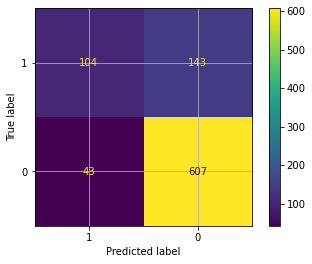

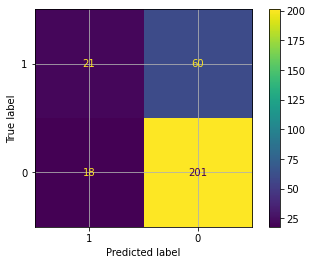

In [16]:
df_model_test_train_acc1, df_model_performance1=print_classifier_scores(lr_best_grid, X_train, X_test, y_train , y_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Logistic Regression')

Append the performance metric result to the dataframe to compare the results

In [17]:
df_model=df_model.append(df_model_performance1,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)

In [18]:
df_model

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.74,0.8375,0.770115,0.917808,0.743249


In [19]:
df_model_test_train_acc

,Model,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.792642,0.74
